# Mushrooms in the wild
## Classification

## The dataset
You are asked to predict if a mushroom is edible or poisonous, based on its physical characteristics, such as `cap-shape`, `odor`, `gill-color`, `stalk-shape`, etc. The dataset is provided [here](https://www.kaggle.com/datasets/uciml/mushroom-classification). The first column, in the accompanying file **mushrooms.csv** represents the mushroom class or target variable: 

**Class:**
- edible
- poisonous

All the physical characteristics are presented as **categorical features**. A full description of the data set can be found [here](https://www.kaggle.com/datasets/uciml/mushroom-classification).

# Import packages

These are all the packages necessary for the entire analysis. I added them here as I needed them, obviously we cannot know beforehand which packages we will need exactly.

In [170]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from collections import Counter
import math
import scipy.stats as ss
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier


from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# Load data

In [ ]:
df = pd.read_csv("mushrooms.csv")

# EDA & preprocessing

I put EDA and preprocessing under the same title because, as will become clear below, there is not really a hard line between the two: not much preprocessing is required because the dataset is very clean, and the small intervention that is needed follows directly from an the data exploration.

First we want to have an overview of the dataset: how many features and records are there, that data-types are they, and whether there are missing values.

In [125]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
class                       8124 non-null object
cap-shape                   8124 non-null object
cap-surface                 8124 non-null object
cap-color                   8124 non-null object
bruises                     8124 non-null object
odor                        8124 non-null object
gill-attachment             8124 non-null object
gill-spacing                8124 non-null object
gill-size                   8124 non-null object
gill-color                  8124 non-null object
stalk-shape                 8124 non-null object
stalk-root                  8124 non-null object
stalk-surface-above-ring    8124 non-null object
stalk-surface-below-ring    8124 non-null object
stalk-color-above-ring      8124 non-null object
stalk-color-below-ring      8124 non-null object
veil-type                   8124 non-null object
veil-color                  8124 non-null object
ring-number

There are 8124 records, and 23 features (including the target: 'class'). The dataset does not contain missing values. This last aspect we could have also obtained via the isnull() function:

In [126]:
df.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

For a quick overview of what the data looks like, we use the .head() function:

In [127]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


To gauge the purity of the dataset, we want to determine if there are identical records. We can do this by omitting any duplicates with the drop_duplicates() function and checking if the length of the resulting dataset is the same as the original dataset:

In [128]:
len(df.drop_duplicates())/len(df)

1.0

It appears that there are no identical records. Now it's best if we also check for duplicates after omitting the class. This is important because in that case there would be mushrooms with identical features but a different class, which would obviously be a contamination of the data.
It appears that we are in the safe zone:

In [129]:
len(df)/len(df.drop_duplicates(subset=df.drop(['class'],axis=1).columns))

1.0

It is also insightful to get an overview of the categories for each variable:

In [130]:
for col in df:
    print(str(col) + ' : ')
    print(np.unique(df[col]))

class : 
['e' 'p']
cap-shape : 
['b' 'c' 'f' 'k' 's' 'x']
cap-surface : 
['f' 'g' 's' 'y']
cap-color : 
['b' 'c' 'e' 'g' 'n' 'p' 'r' 'u' 'w' 'y']
bruises : 
['f' 't']
odor : 
['a' 'c' 'f' 'l' 'm' 'n' 'p' 's' 'y']
gill-attachment : 
['a' 'f']
gill-spacing : 
['c' 'w']
gill-size : 
['b' 'n']
gill-color : 
['b' 'e' 'g' 'h' 'k' 'n' 'o' 'p' 'r' 'u' 'w' 'y']
stalk-shape : 
['e' 't']
stalk-root : 
['?' 'b' 'c' 'e' 'r']
stalk-surface-above-ring : 
['f' 'k' 's' 'y']
stalk-surface-below-ring : 
['f' 'k' 's' 'y']
stalk-color-above-ring : 
['b' 'c' 'e' 'g' 'n' 'o' 'p' 'w' 'y']
stalk-color-below-ring : 
['b' 'c' 'e' 'g' 'n' 'o' 'p' 'w' 'y']
veil-type : 
['p']
veil-color : 
['n' 'o' 'w' 'y']
ring-number : 
['n' 'o' 't']
ring-type : 
['e' 'f' 'l' 'n' 'p']
spore-print-color : 
['b' 'h' 'k' 'n' 'o' 'r' 'u' 'w' 'y']
population : 
['a' 'c' 'n' 's' 'v' 'y']
habitat : 
['d' 'g' 'l' 'm' 'p' 'u' 'w']


We notice that all mushrooms have the same veil-type, so we can discard that feature:

In [131]:
df.drop('veil-type', axis=1, inplace=True)

We now produce barcharts for all variables. That way, we can get a feeling for how the class distribution is per variable:

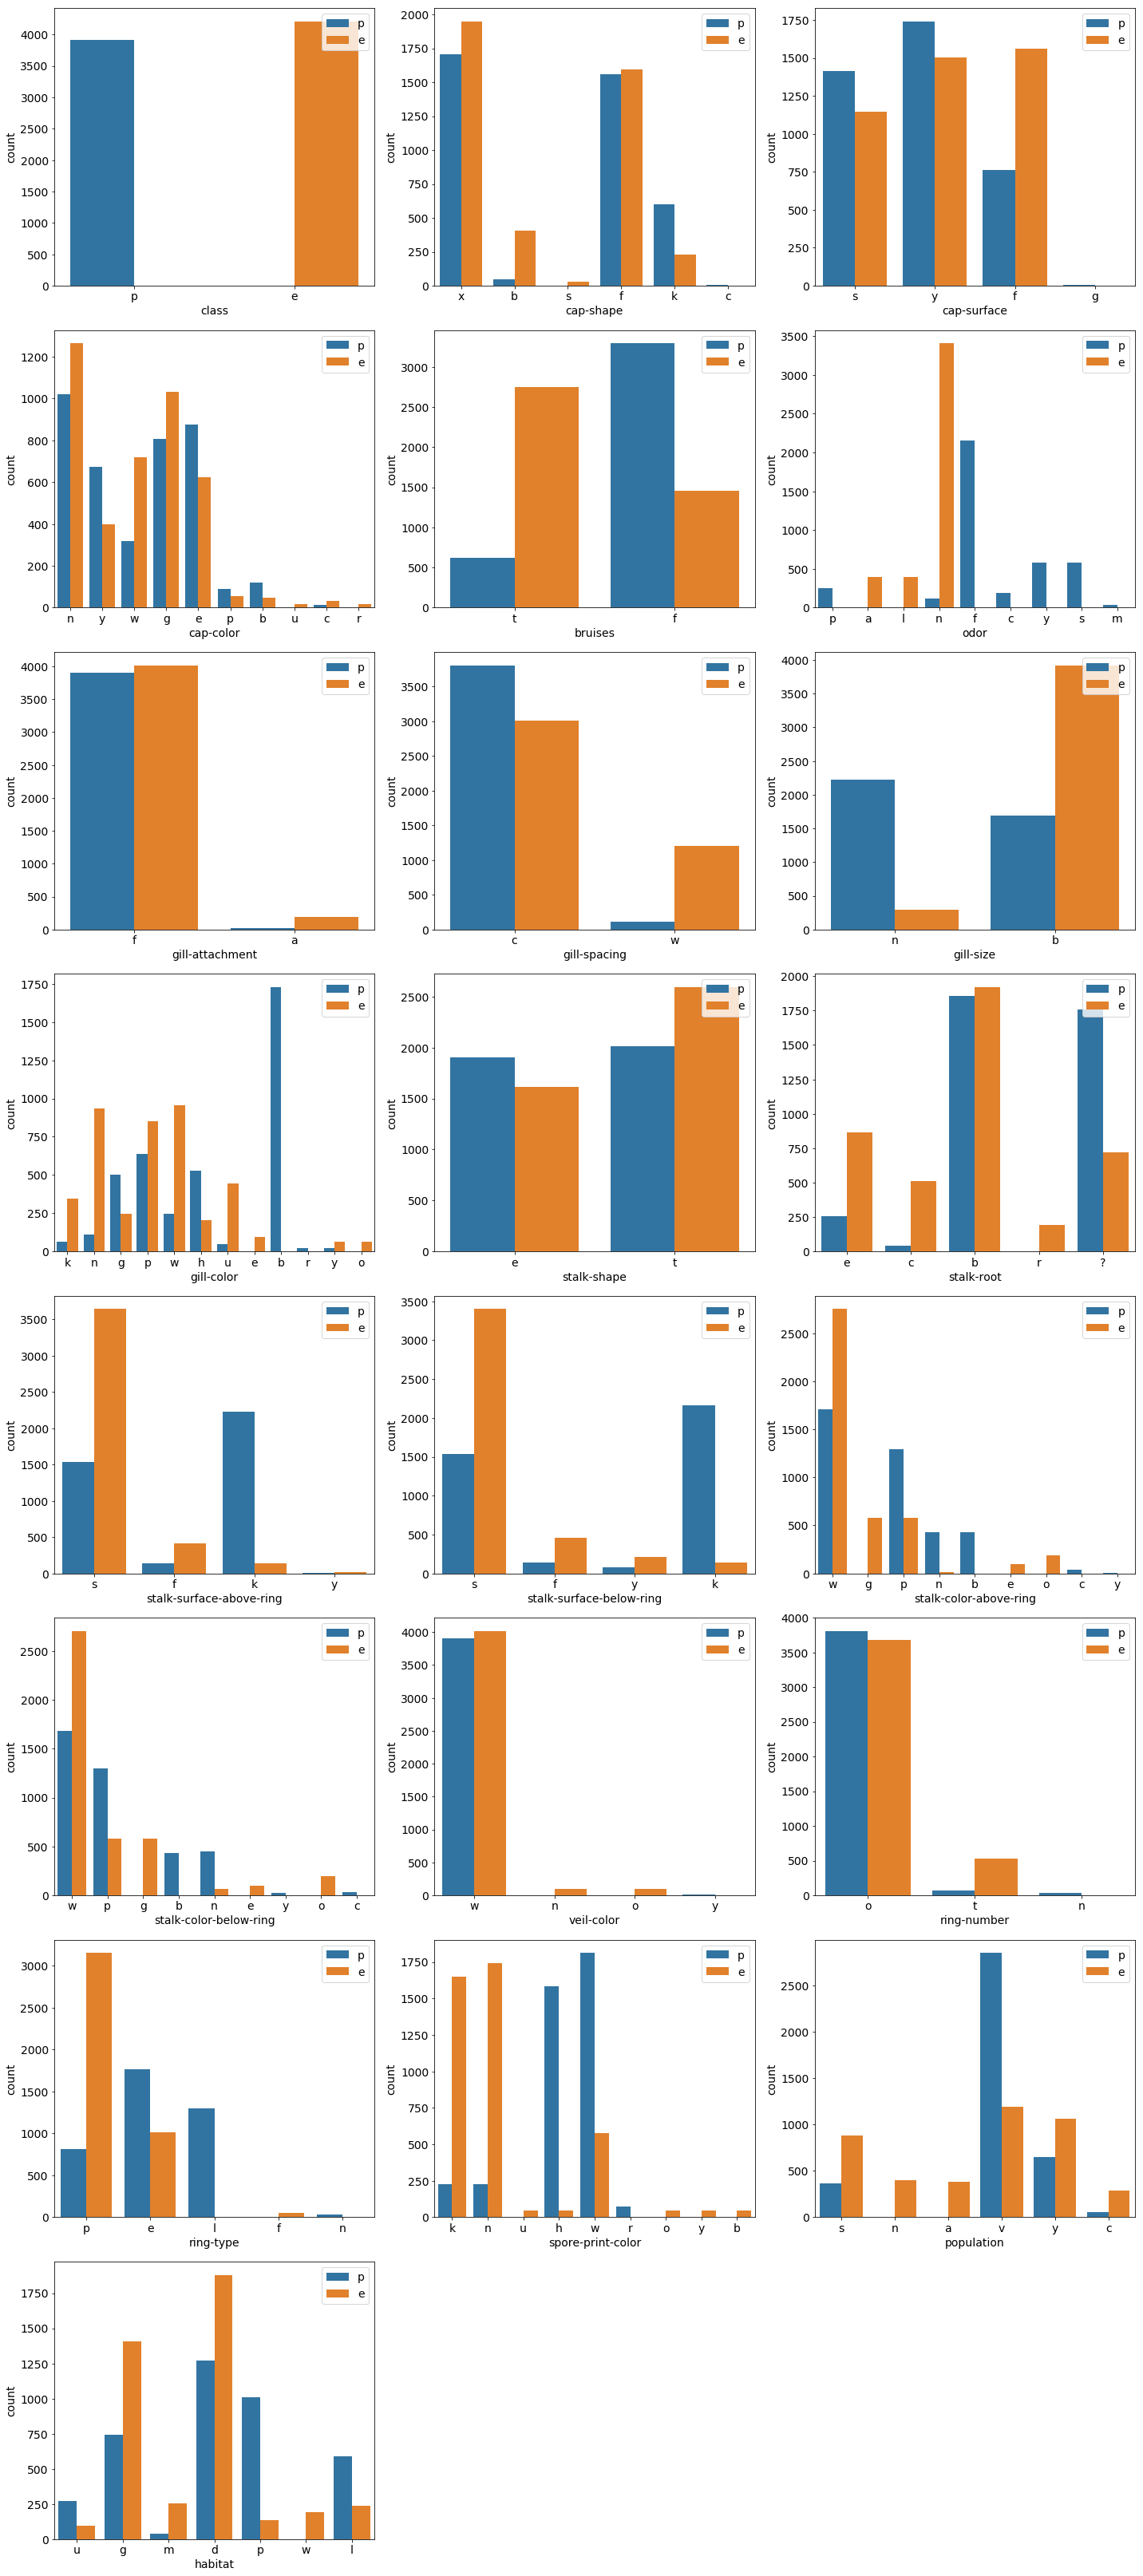

In [132]:
plt.rcParams["figure.figsize"] = (20,50)
for i, var in enumerate(df.columns):
    ax = plt.subplot(9,3,i+1)
    sns.countplot(x=var, hue='class', data=df)
    plt.xlabel(var,fontsize=14)
    plt.ylabel('count',fontsize=14)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.legend(fontsize=14, loc='upper right')
    
plt.tight_layout()
plt.show()

We can conclude that the classes are more or less uniformly distributed. This is important to know because heavily
imbalanced classes tend to lead to poor model performance. (This information also came with the Kaggle dataset, but of course we don't always have neatly presented information like that;-))

We're looking specifically for categories with as much single bars as possible, because based on those categories,
it is possible to predict a good number of labels by considering those individual features. The feature 'odor' seems like such a feature, because all odors perfectly predict the class, and even in case there is no odor, this feature is still an almost perfect predictor of the class. More on that later.

# Correlation analysis

It constitutes considerable 'manual labor' to make preliminary guesses like described in the previous paragraph, so in order to approach this more rigorously, let us investigate the correlations between the features and the class individually. I choose the uncertainty coefficient (a.k.a. Theil's U) as a correlation measure (which is asymmetric), but Cramer's V, for example, would also have done the job in this analysis. We use Theil's U here, but as long as it is a metric that can handle categorical variables (so Pearson correlation would _not_ be meaningful here).
Note that an uncertainty coefficient theil_u (as defined in the following functions) of 0 means y does not say anything about x, and an uncertainty coefficient of 1 means y predicts x entirely.

In [133]:
# The math used in these functions would take us too far in this assigment but I found the following video very
# insightful and intuitive: https://www.youtube.com/watch?v=YtebGVx-Fxw
# Formal definitions on:
# https://en.wikipedia.org/wiki/Conditional_entropy
# https://en.wikipedia.org/wiki/Uncertainty_coefficient
def conditional_entropy(x,y):
    # entropy of x given y
    y_counter = Counter(y) # how many times does each category y occur
    xy_counter = Counter(list(zip(x,y))) # how many times does combination of x and y occur
    total_occurrences = sum(y_counter.values())
    entropy = 0
    for xy in xy_counter.keys():
        p_xy = xy_counter[xy] / total_occurrences
        p_y = y_counter[xy[1]] / total_occurrences
        entropy += p_xy * math.log(p_y/p_xy)
    return entropy

def theil_u(x,y):
    H_xy = conditional_entropy(x,y)
    x_counter = Counter(x)
    total_occurrences = sum(x_counter.values())
    p_x = list(map(lambda n: n/total_occurrences, x_counter.values()))
    H_x = ss.entropy(p_x)
    if H_x == 0:
        return 1
    else:
        return (H_x - H_xy) / H_x

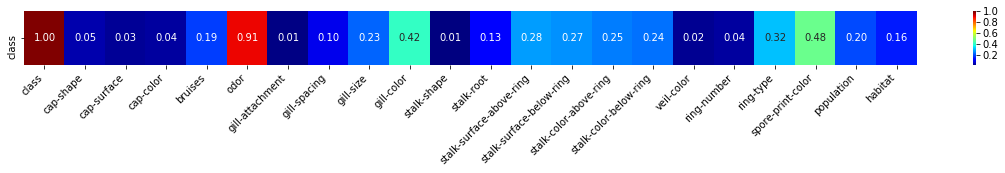

In [134]:
theilu = pd.DataFrame(index=['class'],columns=df.columns)
columns = df.columns
for j in range(0,len(columns)):
    u = theil_u(df['class'].tolist(),df[columns[j]].tolist())
    theilu.loc[:,columns[j]] = u
theilu.fillna(value=np.nan,inplace=True)
plt.figure(figsize=(20,1))
sns.heatmap(theilu,annot=True,fmt='.2f', cmap='jet')
plt.xticks(rotation=45, ha='right') 
plt.show()

We notice that there are several features that are fairly good to very good predictors of the target 'class'.
Now we conduct the same analysis for the features themselves. (See below. The top column is the same as the separate graph shown above). It is immediately clear that there are also quite some correlations between the variables. It is important to realize this because it may affect some models more than others.

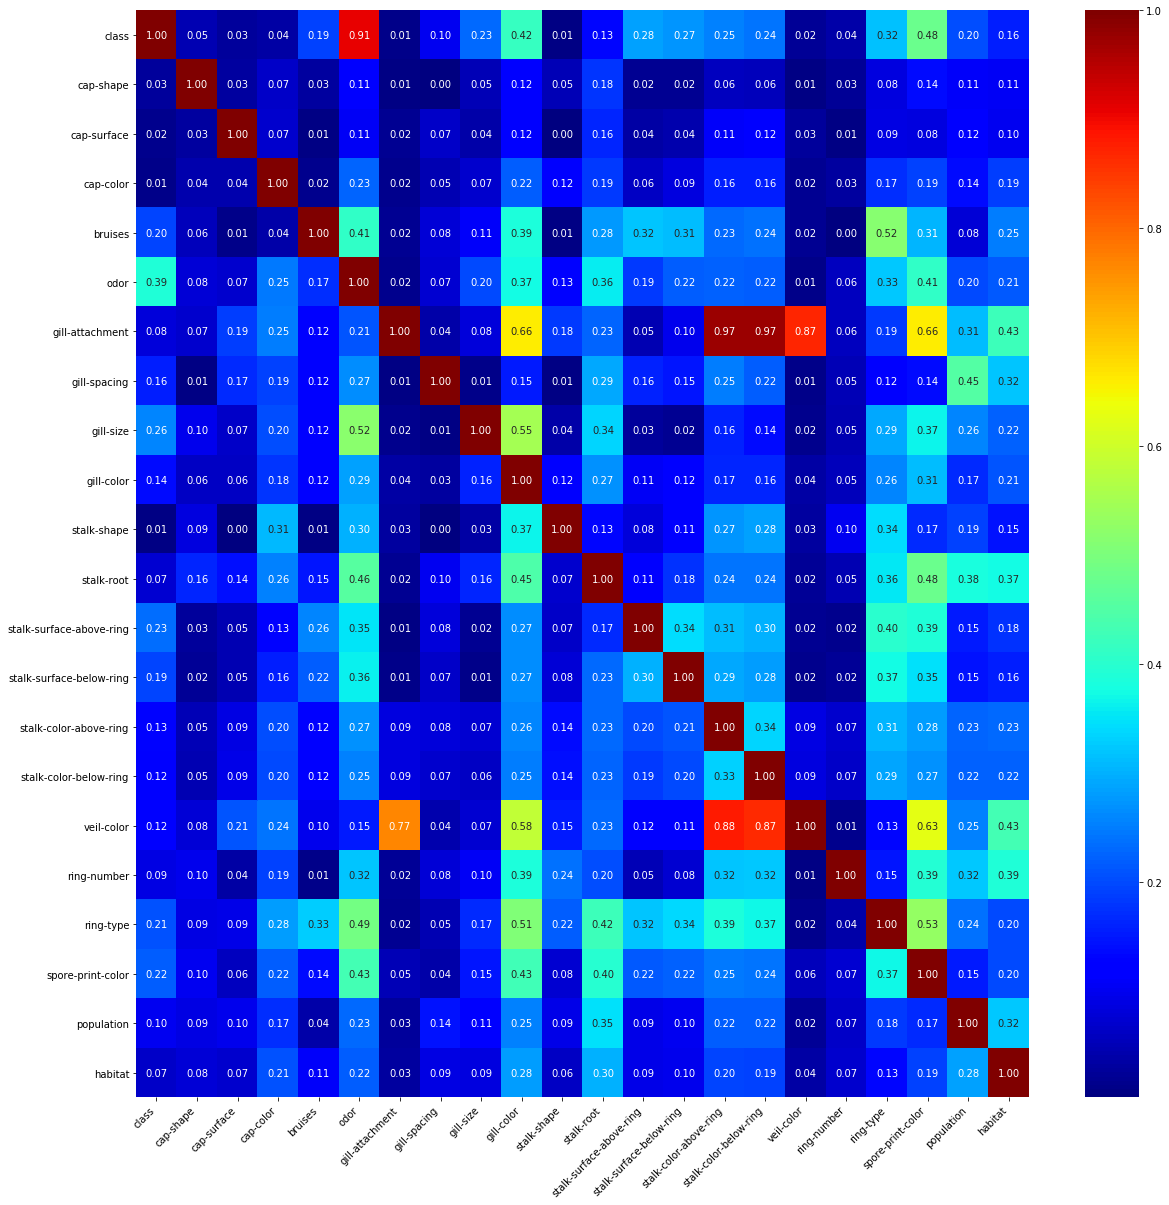

In [135]:
theilu = pd.DataFrame(index=df.columns,columns=df.columns)
columns = df.columns
for j in range(0,len(columns)):
    for i in range(0,len(columns)):
        u = theil_u(df[columns[i]].tolist(),df[columns[j]].tolist())
        theilu.loc[columns[i],columns[j]] = u
    
theilu.fillna(value=np.nan,inplace=True)
plt.figure(figsize=(20,20))
sns.heatmap(theilu,annot=True,fmt='.2f', cmap='jet')
plt.xticks(rotation=45, ha='right') 
plt.show()

# Modelling

Since we're talking about edible vs. poisonous mushrooms, it seems logical that we create a model with a high
degree of interpretability. We have a fully categorical dataset with +8000 records and +100 categories (taking into account dummies). Hence, the most obvious models to try here are Naive Bayes, logistic regression and decision tree. Naive Bayes is expected to give the least reliable results, as it formally expects statistically independent variables (hence _naive_ Bayes). The assignment asked for three models, but since Naive Bayes is not exactly the right fit in this case, we will choose KNN instead. This seems reasonable because we have a relatively large dataset with many more records than variables.

In [136]:
Xy = df.copy()

In [266]:
# Split dataset into independent variables (X) and target variable (y).
X = Xy.drop(['class'], axis=1)
y = Xy['class']

# Create dummy variables for the categories.
X = pd.get_dummies(X, drop_first=False)

# Note that I would like to use drop_first=True because of multicollinearity, but I noticed that in this
# this case it decreases accuracy on train and test sets so I refrained from it eventually.

# Randomly generate train and test sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=0)

In [138]:
# Naive Bayes
# (The Gaussian variety is considered best for categorical variables, though I did not test the condition of Gaussian distribution)

GNB = GaussianNB() # create instance
GNB.fit(X_train, y_train) # Fit the model

GaussianNB(priors=None)

In [139]:
y_pred = GNB.predict(X_test) # Apply the model to make predictions on the test set
print('Accuracy score for Naive Bayes: ' +str(accuracy_score(y_test, y_pred)) +'\n')
print(classification_report(y_test, y_pred))

Accuracy score for Naive Bayes: 0.9667692307692307

             precision    recall  f1-score   support

          e       1.00      0.94      0.97       852
          p       0.93      1.00      0.97       773

avg / total       0.97      0.97      0.97      1625



In [140]:
# Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [141]:
y_pred = logreg.predict(X_test)
print('Accuracy score for logistic regression: ' +str(accuracy_score(y_test, y_pred)) +'\n')
print(classification_report(y_test, y_pred))

Accuracy score for logistic regression: 1.0

             precision    recall  f1-score   support

          e       1.00      1.00      1.00       852
          p       1.00      1.00      1.00       773

avg / total       1.00      1.00      1.00      1625



In [267]:
# Decision tree
DT_clf = DecisionTreeClassifier(max_depth=6)
DT_clf.fit(X_train, y_train)
y_pred = DT_clf.predict(X_test)
print('Accuracy score for decision tree: ' +str(accuracy_score(y_test, y_pred)) +'\n')
print(classification_report(y_test, y_pred))

Accuracy score for decision tree: 1.0

             precision    recall  f1-score   support

          e       1.00      1.00      1.00       852
          p       1.00      1.00      1.00       773

avg / total       1.00      1.00      1.00      1625



In [143]:
# KNN
KNN = KNeighborsClassifier(n_neighbors=3)
KNN.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [144]:
y_pred = KNN.predict(X_test)
print('Accuracy score for KNN: ' +str(accuracy_score(y_test, y_pred)) +'\n')
print(classification_report(y_test, y_pred))

Accuracy score for KNN: 1.0

             precision    recall  f1-score   support

          e       1.00      1.00      1.00       852
          p       1.00      1.00      1.00       773

avg / total       1.00      1.00      1.00      1625



# Reducing the number of variables

Apart from the Naive Bayes model, which we were doubtful about already, the three other models return a perfect result with the standard settings. The tuning of hyperparameters is therefore not appropriate at this stage.

It does however offer an opportunity to construct a model based on a subset of the features. After all, it is always preferable to end up with a good model with the smallest number of features possible. Moreover, the consumption of poisonous mushrooms can be lethal, so if we have the ability at all to make this determination with the least amount of available information, we should (!).

The strategy I propose here is to start off a model (say, logistic regression) with one promising feature, and then add one after the other feature to obtain the the best possible result. This is what the function 'add_one_var' does (see below): It starts with an elective_list of variables, and then finds which of the remaining variables should be added to obtain the best possible model. 'add_one_var' can then be executed a number of times, with a growing elective_list each time. Given that the feature 'odor' appeared to have good predictive potential, as deduced from the exploratory data analysis, and also shows the highest uncertainty coefficient in relation to the target, I use it as the starting point for the function add_one_var. First we check what is the accuracy of the model when we use only 'odor' as variable:

In [254]:
Xy = df.copy()

# We select only the variable 'odor' from the dataset:
X = Xy['odor']
y = Xy['class']

X = pd.get_dummies(X, drop_first=False)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print('Accuracy score for logistic regression: ' +str(accuracy_score(y_test, y_pred)) +'\n')
print(classification_report(y_test, y_pred))

Accuracy score for logistic regression: 0.9883076923076923

             precision    recall  f1-score   support

          e       0.98      1.00      0.99       852
          p       1.00      0.98      0.99       773

avg / total       0.99      0.99      0.99      1625



It is remarkable that this one feature is already so accurate! This is a good sign that we will not need many variables to yet obtain a perfect prediction. Let us find out:

In [291]:
Xy = df.copy()

X = Xy.drop(['class'], axis=1)
y = Xy['class']

var_list=list(X) # make a list of the independent variables that we want to add to the chosen starting variable 'odor'
var_list.remove('odor') # we remove 'odor' because that's the one we start out with.
elective_list =['odor'] # we instantiate the list of most predictive variables with 'odor'

In [283]:
def add_one_var(X, var_list, elective_list, y):
    '''
    X: Dataframe with all variables (except the target)
    var_list: list of all variables you want to include in the optimization of the model
    elective_list: list of variables you want to include by default
    
    output: the variable that optimizes the model the best and the corresponding accuracy score. (Based on logistic regression
    with standard settings, elective_list plus the best variable.
    '''
    temp_score = 0 # initialization of local variables
    best_score = 0
    best_var = 'none'
    temp_list = elective_list # temp_list is initialized from elective_list: the list of variables 

    for var in var_list:
        temp_list = elective_list + [var]
        # Now we fit the model with a new combination of variables each time, based on the elective_list plus one new one.
        Z = X[temp_list] 
        Z = pd.get_dummies(Z, drop_first=False)
        Z_train, Z_test, y_train, y_test = train_test_split(Z, y, test_size= 0.2, random_state=0)
        logreg = LogisticRegression()
        logreg.fit(Z_train, y_train)
        y_pred = logreg.predict(Z_test)
        temp_score = accuracy_score(y_test, y_pred)
        if temp_score > best_score:
            best_score = temp_score
            best_var = var
    return best_var, best_score

We now execute this function a number of times so that the elective_list of variables can be automatically built. The results point out that we need only 7 variables in total to obtain a perfect model:

In [293]:
for i in range(6):
    (best_var, best_score )= add_one_var(X, var_list, elective_list, y)
    print(str(i+1)+'. Adding variable \'' + best_var +'\' brings the accuracy score to: ' + str(best_score))
    elective_list = elective_list + [best_var]
    var_list.remove(best_var)

1. Adding variable 'spore-print-color' brings the accuracy score to: 0.9963076923076923
2. Adding variable 'cap-color' brings the accuracy score to: 0.9987692307692307
3. Adding variable 'stalk-surface-above-ring' brings the accuracy score to: 1.0
4. Adding variable 'cap-shape' brings the accuracy score to: 1.0
5. Adding variable 'cap-surface' brings the accuracy score to: 1.0
6. Adding variable 'bruises' brings the accuracy score to: 1.0


It may look as if 'cap-shape', 'cap-surface' and 'cap-color' do not add to the accuracy, but omitting them and putting 'gill-size' directly after 'stalk-color-below-ring' does not yield a perfect model. I checked this by printing all intermediate scores, and for the iterations where 'cap-shape', 'cap-surface' and 'cap-color' are added, basically all of the features yield the same score (and the code thus executes correctly). It isn't until 'gill-size' is added that the score becomes 1. Why is this? I reckon it could be a result of my choice of starting variable. Let us choose 'gill-size' as starting variable instead and see what happens:

In [260]:
Xy = df.copy()

X = Xy.drop(['class'], axis=1)
y = Xy['class']

var_list=list(X) # make a list of the independent variables that we want to add to the chosen starting variable 'odor'
var_list.remove('gill-size') # we remove 'gill-size' because that's the one we start out with.
elective_list =['gill-size'] # we instantiate the list of most predictive variables with 'gill-size'

for i in range(3):
    (best_var, best_score )= add_one_var(X, var_list, elective_list, y)
    print(str(i+1)+'. Adding variable \'' + best_var +'\' brings the accuracy score to: ' + str(best_score))
    elective_list = elective_list + [best_var]
    var_list.remove(best_var)

1. Adding variable 'odor' brings the accuracy score to: 0.9883076923076923
2. Adding variable 'spore-print-color' brings the accuracy score to: 0.9963076923076923
3. Adding variable 'stalk-surface-above-ring' brings the accuracy score to: 1.0


We see that indeed the choice of starting variable makes a difference and we actually need only four parameters for a perfect model! We couldn't have known this, because gill-size itself is a less predictive variable than 'odor'. This is a good example that in the construction of models requires some alertness and a modest amount of trial and error.

In [258]:
# One last confirmation of the seven final variables:

print('Minimal and optimized list of variables:\n' + str(elective_list) + '\n')

Xy = df.copy()

X = Xy[elective_list]
y = Xy['class']

X = pd.get_dummies(X, drop_first=False)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print('Accuracy score for optimized model: ' +str(accuracy_score(y_test, y_pred)) +'\n')
print(classification_report(y_test, y_pred))

Minimal and optimized list of variables:
['gill-size', 'odor', 'spore-print-color', 'stalk-surface-above-ring']

Accuracy score for optimized model: 1.0

             precision    recall  f1-score   support

          e       1.00      1.00      1.00       852
          p       1.00      1.00      1.00       773

avg / total       1.00      1.00      1.00      1625



For the sake of completeness, we draw a ROC curve:

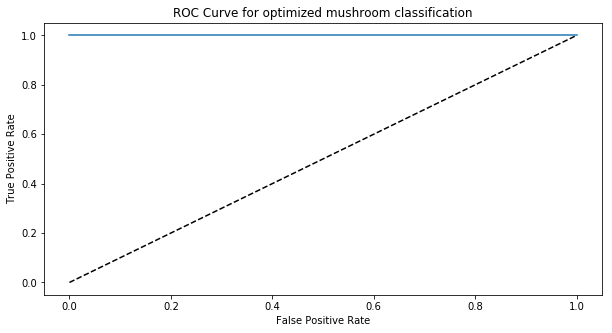

AUC-score: 1.0


In [259]:
# First convert classes to 1's and 0's via a dictionary:
class_dict= {
    'p': 1,
    'e': 0
}

y_pred = [class_dict[x] for x in y_pred]
y_test = [class_dict[x] for x in y_test]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, pd.Series(y_pred))
plt.rcParams["figure.figsize"] = (10,5)
plt.plot([0, 1], [0, 1], 'k--')

# Plot tpr against fpr

plt.plot(fpr, tpr)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for optimized mushroom classification')
plt.show()

# Calculate roc_auc_score
print('AUC-score: ' + str(roc_auc_score(y_test, y_pred)))

This indeed confirms that we can make a perfect model with only 4 of the 22 provided features to classify the mushrooms.